# Which genre's generate higher average gross in Holiday season

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import csv files into tables
title_basics = pd.read_csv('data/imdb.title.basics.csv')
years = pd.read_csv('data/bothyear.csv') #This is our webscraped csv

In [3]:
#splitting up genres by comma split
title_basics['genre1'] = title_basics['genres'].str.split(',', 1, expand=True)[0]
title_basics['genre2'] = title_basics['genres'].str.split(',', 1, expand=True)[1]
title_basics['genre3'] = title_basics['genre2'].str.split(',', 1, expand=True)[1]

In [4]:
#Since genre2 still had commas, and we split that to genre3, we can get rid of the comma
title_basics['genre2'] = title_basics['genre2'].str.split(',', 1, expand=True)[0]

In [5]:
#renaming column so that we can merge between tables
title_basics.rename(columns={'primary_title':'title'}, 
                 inplace=True)

In [6]:
#KEEPING ONLY MOVIES FROM 2018 and 2019
title_2019 = title_basics[title_basics.start_year == 2019]
title_2018 = title_basics[title_basics.start_year == 2018]
title_1819 = [title_2019,title_2018]
title1819 = pd.concat(title_1819)

In [7]:
#We want only the holiday movies since we found that season to have the highest average grossing movies
years.drop(years[years.seasonn != 'Holiday'].index, inplace = True)

In [8]:
#Left merge the two tables, our left table being 'years'. This is the table we scrapped from BoxOfficeMojo
df_merge = pd.merge(years, title1819, on='title', how='left')

In [9]:
#We want to drop the length of movies which are null
df_merge.dropna(subset = ['runtime_minutes'], axis = 0, inplace = True)

In [10]:
df_merge.runtime_minutes.describe()

count    196.000000
mean     107.984694
std       21.903864
min       29.000000
25%       91.000000
50%      106.000000
75%      120.000000
max      189.000000
Name: runtime_minutes, dtype: float64

In [11]:
#CATEGORIZING RUNTIME OF MOVIES: Short(runtime < 90 minutes), Average(90<runtime<120), Long(120<x)
df_merge['length_movie'] = df_merge.runtime_minutes.map(lambda x: 
                                                  'Short (<90 Minutes)' if x< 90 
                                                  else('Average (between 90, and 120 minutes)' 
                                                       if 90<x<120 else'Long(over 120 minutes)'))

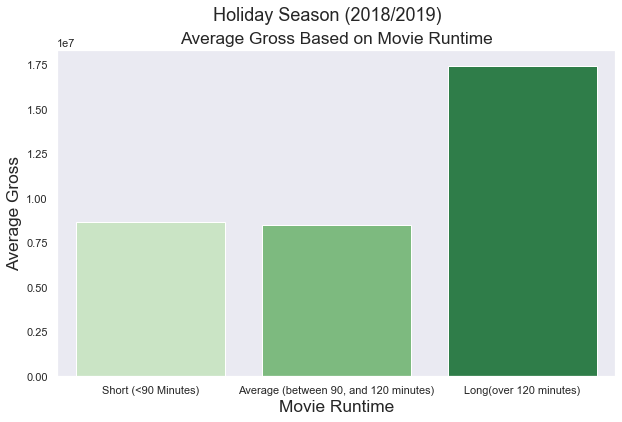

In [81]:
#Lets graph and see what's the ideal length of movies!
y = df_merge.groupby('length_movie').gross.mean();
x = y.index;
figure, ax = plt.subplots(figsize = (10,6));
g=sns.barplot(x,y, palette="Greens", order=["Short (<90 Minutes)", "Average (between 90, and 120 minutes)", "Long(over 120 minutes)"]);
sns.set(style='dark')

ax.set_title('Average Gross Based on Movie Runtime', fontdict={'fontsize':'x-large'});
ax.set_xlabel('Movie Runtime', fontdict={'fontsize':'x-large'});
ax.set_ylabel('Average Gross', fontdict={'fontsize':'x-large'});

plt.suptitle("Holiday Season (2018/2019)", fontsize=18);


In [13]:
#TO FIND HOW MANY GENRE'S EACH MOVIE HAS!!!

istrue = lambda x: x!=None
countgenres = lambda row: istrue(row['genre1']) + istrue(row['genre2']) + istrue(row['genre3'])
df_merge['num_genres'] = df_merge.apply(countgenres, axis=1)

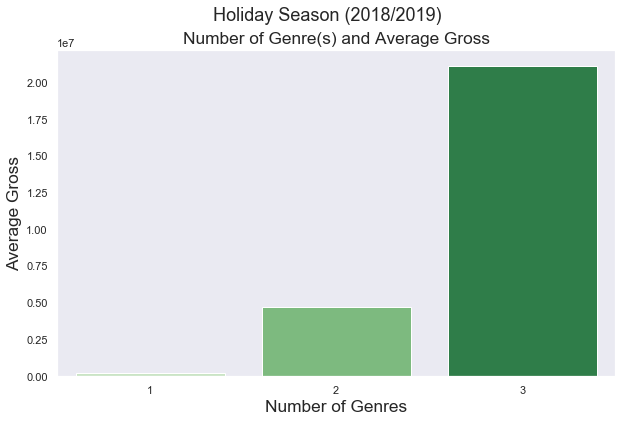

In [83]:
#Plotting how many genre's a movie crosses vs their average 
y = df_merge.groupby('num_genres').gross.mean()
x = y.index
figure, ax = plt.subplots(figsize = (10,6));
sns.barplot(x,y, palette = 'Greens');
sns.set(style='dark')
ax.set_title('Number of Genre(s) and Average Gross', fontdict={'fontsize':'x-large'});
ax.set_xlabel('Number of Genres', fontdict={'fontsize':'x-large'});
ax.set_ylabel('Average Gross', fontdict={'fontsize':'x-large'});
plt.suptitle("Holiday Season (2018/2019)", fontsize=18);


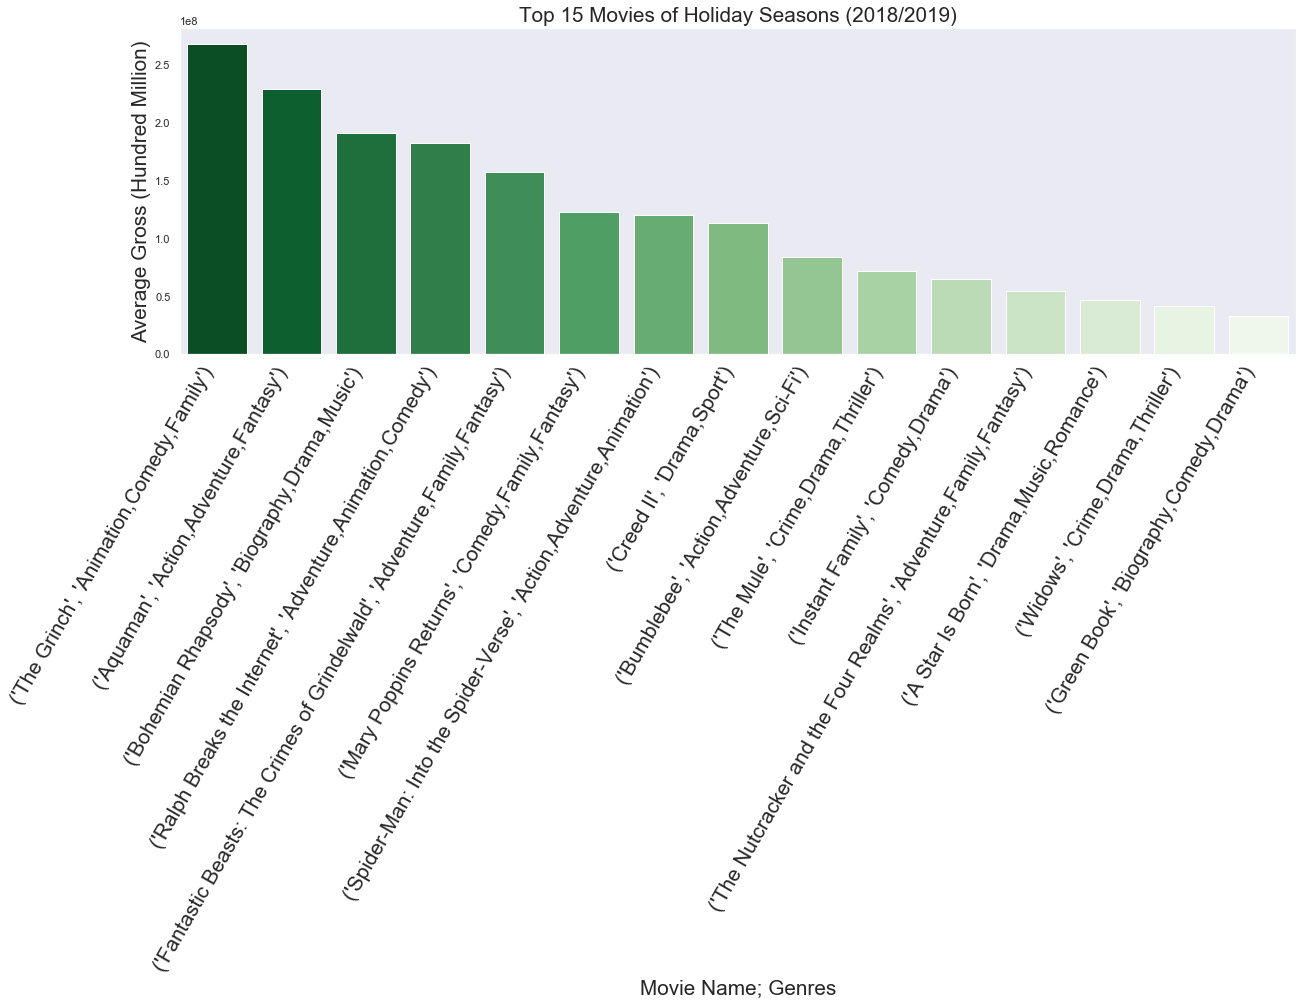

In [85]:
# We want to see the top grossing movies of the summer and what genre's they cross

y = df_merge.groupby(['title', 'genres'])['gross'].sum().sort_values(ascending = False)[:15]
x = y.index
figure, ax = plt.subplots(figsize = (20,6))
char = sns.barplot(x,y, palette="Greens_r");
sns.set(style="dark")
ax.set_title('Top 15 Movies of Holiday Seasons (2018/2019)', fontdict={'fontsize':'xx-large'})
ax.set_xlabel('Movie Name; Genres', fontdict={'fontsize':'xx-large'})
ax.set_ylabel('Average Gross (Hundred Million)', fontdict={'fontsize':'xx-large'})
char.set_xticklabels(
    char.get_xticklabels(), 
    rotation=60, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='xx-large');


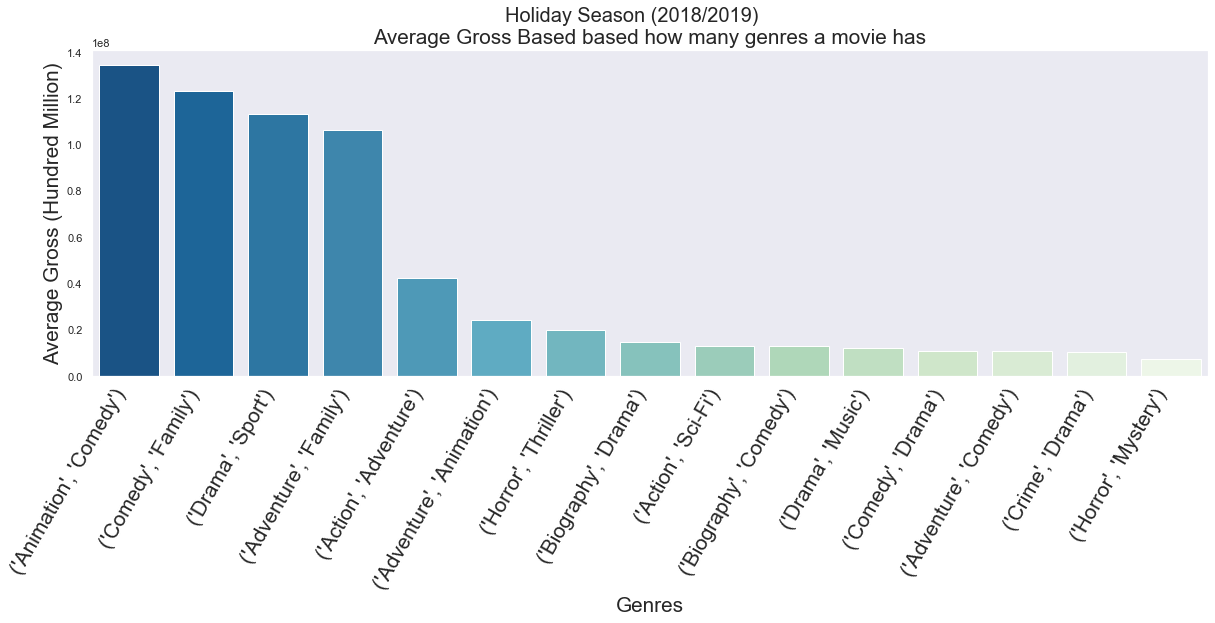

In [87]:
y = df_merge.groupby(['genre1', 'genre2'])['gross'].mean().sort_values(ascending = False)[:15]
x = y.index
figure, ax = plt.subplots(figsize = (20,6))
char = sns.barplot(x,y, palette='GnBu_r');

ax.set_title('Average Gross Based based how many genres a movie has', fontdict={'fontsize':'xx-large'})
ax.set_xlabel('Genres', fontdict={'fontsize':'xx-large'})
ax.set_ylabel('Average Gross (Hundred Million)', fontdict={'fontsize':'xx-large'})
char.set_xticklabels(
    char.get_xticklabels(), 
    rotation=60, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='xx-large');
plt.suptitle("Holiday Season (2018/2019)", fontsize=20);


In [17]:
df_merge.columns

Index(['Unnamed: 0', 'title', 'theaters', 'release', 'distributor', 'gross',
       'total_gross', 'season_year', 'seasonn', 'season', 'tconst',
       'original_title', 'start_year', 'runtime_minutes', 'genres', 'genre1',
       'genre2', 'genre3', 'length_movie', 'num_genres'],
      dtype='object')

In [18]:
df_merge.loc[(df_merge['runtime_minutes']>90)].shape
#          (df_merge['genre2']=='Comedy')]
#              (df_merge['genre3']=='Sci-Fi')]

(150, 20)

In [19]:
df_merge[['gross', 'runtime_minutes', 'total_gross','start_year', 'num_genres']].corr()

,gross,runtime_minutes,total_gross,start_year,num_genres
gross,1.000000,0.146407,0.625258,-0.021680,0.243709
runtime_minutes,0.146407,1.000000,0.144128,-0.078615,0.221085
total_gross,0.625258,0.144128,1.000000,-0.027763,0.285528
start_year,-0.021680,-0.078615,-0.027763,1.000000,-0.106581
num_genres,0.243709,0.221085,0.285528,-0.106581,1.000000


In [20]:
df_merge.corr()

,Unnamed: 0,gross,total_gross,season_year,start_year,runtime_minutes,num_genres
Unnamed: 0,1.000000,-0.427778,-0.412249,NaN,-0.001413,-0.232849,-0.405774
gross,-0.427778,1.000000,0.625258,NaN,-0.021680,0.146407,0.243709
total_gross,-0.412249,0.625258,1.000000,NaN,-0.027763,0.144128,0.285528
season_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_year,-0.001413,-0.021680,-0.027763,NaN,1.000000,-0.078615,-0.106581
runtime_minutes,-0.232849,0.146407,0.144128,NaN,-0.078615,1.000000,0.221085
num_genres,-0.405774,0.243709,0.285528,NaN,-0.106581,0.221085,1.000000


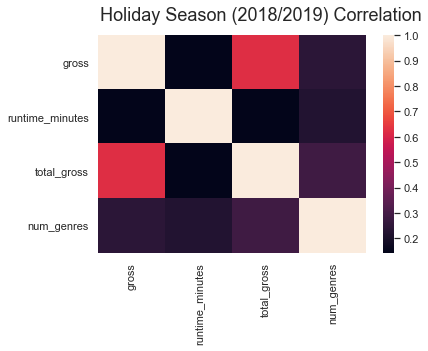

In [89]:
sns.heatmap(df_merge[['gross', 'runtime_minutes', 'total_gross', 'num_genres']].corr())
plt.suptitle("Holiday Season (2018/2019) Correlation", fontsize=18);